# Qual o desafio?

Nós trabalhamos em uma empresa de delivery, em um time de dados centralizado que atende a diversas áreas e recebemos algumas demandas:

- Numa ação de marketing, para atrair mais entregadores, vamos dar uma bonificação para os 20 entregadores que possuem maior distância percorrida ao todo. A bonificação vai variar de acordo com o tipo de profissional que ele é e o modelo que ele usa para se locomover (moto, bike, etc). Levante essas informações.

- Além disso, o time de Pricing precisa ajustar os valores pagos aos entregadores. Para isso, eles precisam da distribuição da distância média percorrida pelos motoqueiros separada por estado, já que cada região terá seu preço.

- Por fim, o CFO precisa de alguns indicadores de receita para apresentar para a diretoria executiva. Dentre esses indicadores, vocês precisarão levantar (1) a receita média e total separada por tipo (Food x Good), (2) A receita média e total por estado. Ou seja, são 4 tabelas ao todo.

- Se a empresa tem um gasto fixo de 5 reais por entrega, recebe 15% do valor de cada entrega como receita e, do total do lucro, distribui 20% em forma de bônus para os 2 mil funcionários, quanto cada um irá receber no período contido no dataset?

# Carregamento de bibliotecas

In [5]:
import pandas as pd

# Carregamento das bases de dados

In [6]:
channels = pd.read_csv('dados/channels.csv', encoding='iso-8859-1')
deliveries = pd.read_csv('dados/deliveries.csv', encoding='iso-8859-1')
drivers = pd.read_csv('dados/drivers.csv', encoding='iso-8859-1')
hubs = pd.read_csv('dados/hubs.csv', encoding='iso-8859-1')
orders = pd.read_csv('dados/orders.csv', encoding='iso-8859-1')
payments = pd.read_csv('dados/payments.csv', encoding='iso-8859-1')
stores = pd.read_csv('dados/stores.csv', encoding='iso-8859-1')

# Análise da estrutura das bases de dados

## deliveries

In [7]:
deliveries.shape

(378843, 5)

In [8]:
deliveries.head()

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2174658,68413340,8378.0,5199.0,DELIVERED
1,2174660,68414309,2473.0,410.0,DELIVERED
2,2174661,68416230,7615.0,3784.0,DELIVERED
3,2174663,68412721,8378.0,5714.0,DELIVERED
4,2174675,68414018,10463.0,3746.0,DELIVERED


In [9]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378843 entries, 0 to 378842
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   delivery_id               378843 non-null  int64  
 1   delivery_order_id         378843 non-null  int64  
 2   driver_id                 362957 non-null  float64
 3   delivery_distance_meters  378770 non-null  float64
 4   delivery_status           378843 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 14.5+ MB


## channels

In [10]:
channels.shape

(40, 3)

In [11]:
channels.head()

,channel_id,channel_name,channel_type
0,1,OTHER PLACE,OWN CHANNEL
1,2,PHONE PLACE,OWN CHANNEL
2,3,WHATS PLACE,OWN CHANNEL
3,4,FACE PLACE,OWN CHANNEL
4,5,FOOD PLACE,MARKETPLACE


In [12]:
channels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channel_id    40 non-null     int64 
 1   channel_name  40 non-null     object
 2   channel_type  40 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


## drivers

In [13]:
drivers.shape

(4824, 3)

In [14]:
drivers.head()

,driver_id,driver_modal,driver_type
0,133,MOTOBOY,LOGISTIC OPERATOR
1,138,MOTOBOY,FREELANCE
2,140,MOTOBOY,FREELANCE
3,143,BIKER,FREELANCE
4,148,MOTOBOY,FREELANCE


In [15]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4824 entries, 0 to 4823
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   driver_id     4824 non-null   int64 
 1   driver_modal  4824 non-null   object
 2   driver_type   4824 non-null   object
dtypes: int64(1), object(2)
memory usage: 113.2+ KB


## hubs

In [16]:
hubs.shape

(32, 6)

In [17]:
hubs.head()

,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,2,BLUE SHOPPING,PORTO ALEGRE,RS,-30.047415,-51.213510
1,3,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
2,4,RED SHOPPING,PORTO ALEGRE,RS,-30.021948,-51.208382
3,5,FUNK SHOPPING,RIO DE JANEIRO,RJ,-23.000750,-43.318282
4,8,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.921475,-43.234774


In [18]:
hubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hub_id         32 non-null     int64  
 1   hub_name       32 non-null     object 
 2   hub_city       32 non-null     object 
 3   hub_state      32 non-null     object 
 4   hub_latitude   32 non-null     float64
 5   hub_longitude  32 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ KB


## orders

In [19]:
orders.shape

(368999, 29)

In [20]:
orders.head()

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
0,68405119,3512,5,68405119,68405119,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.5,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68405465,3401,5,68405465,68405465,CANCELED,55.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68406064,3401,5,68406064,68406064,CANCELED,37.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368999 entries, 0 to 368998
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           368999 non-null  int64  
 1   store_id                           368999 non-null  int64  
 2   channel_id                         368999 non-null  int64  
 3   payment_order_id                   368999 non-null  int64  
 4   delivery_order_id                  368999 non-null  int64  
 5   order_status                       368999 non-null  object 
 6   order_amount                       368999 non-null  float64
 7   order_delivery_fee                 368999 non-null  float64
 8   order_delivery_cost                361794 non-null  float64
 9   order_created_hour                 368999 non-null  int64  
 10  order_created_minute               368999 non-null  int64  
 11  order_created_day                  3689

## payments

In [22]:
payments.shape

(400834, 6)

In [23]:
payments.head()

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
1,4427918,68410055,394.81,7.90,ONLINE,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID
3,4427948,68413340,58.80,1.59,ONLINE,PAID
4,4427955,68414018,45.80,0.92,ONLINE,PAID


In [24]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400834 entries, 0 to 400833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   payment_id        400834 non-null  int64  
 1   payment_order_id  400834 non-null  int64  
 2   payment_amount    400834 non-null  float64
 3   payment_fee       400659 non-null  float64
 4   payment_method    400834 non-null  object 
 5   payment_status    400834 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 18.3+ MB


## stores

In [25]:
stores.shape

(951, 7)

In [26]:
stores.head()

,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.203520
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.203520
3,53,8,PAPA SUCIS,FOOD,0.0,-22.921475,-43.234822
4,54,8,VUZPI PAZZIS,FOOD,0.0,-22.921475,-43.234822


In [27]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          951 non-null    int64  
 1   hub_id            951 non-null    int64  
 2   store_name        951 non-null    object 
 3   store_segment     951 non-null    object 
 4   store_plan_price  836 non-null    float64
 5   store_latitude    935 non-null    float64
 6   store_longitude   935 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 52.1+ KB


# Tratando as bases de dados

## Tratando a base deliveries

In [28]:
deliveries.isnull().sum()

delivery_id                     0
delivery_order_id               0
driver_id                   15886
delivery_distance_meters       73
delivery_status                 0
dtype: int64

In [29]:
deliveries.dropna(subset=['driver_id', 'delivery_distance_meters'], inplace=True)
deliveries.reset_index()

,index,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,0,2174658,68413340,8378.0,5199.0,DELIVERED
1,1,2174660,68414309,2473.0,410.0,DELIVERED
2,2,2174661,68416230,7615.0,3784.0,DELIVERED
3,3,2174663,68412721,8378.0,5714.0,DELIVERED
4,4,2174675,68414018,10463.0,3746.0,DELIVERED
...,...,...,...,...,...,...
362923,378838,3134825,87083078,7615.0,8110.0,DELIVERED
362924,378839,3135417,87660079,26223.0,14454.0,DELIVERED
362925,378840,3135849,82340127,55429.0,2546.0,DELIVERED
362926,378841,3142829,88586792,47016.0,3106.0,DELIVERED


In [30]:
deliveries.isnull().sum()

delivery_id                 0
delivery_order_id           0
driver_id                   0
delivery_distance_meters    0
delivery_status             0
dtype: int64

In [31]:
deliveries.duplicated().sum()

np.int64(0)

In [32]:
deliveries.describe()

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters
count,3.629280e+05,3.629280e+05,362928.000000,3.629280e+05
mean,2.635871e+06,8.225126e+07,21001.279576,2.818972e+03
std,2.650984e+05,7.009141e+06,15520.315158,1.874356e+04
min,2.174658e+06,6.841006e+07,133.000000,0.000000e+00
25%,2.406176e+06,7.634388e+07,7615.000000,1.172000e+03
50%,2.641922e+06,8.319153e+07,18754.000000,2.044000e+03
75%,2.862955e+06,8.792014e+07,31048.000000,3.419000e+03
max,3.144739e+06,9.313982e+07,66459.000000,7.251291e+06


<Axes: >

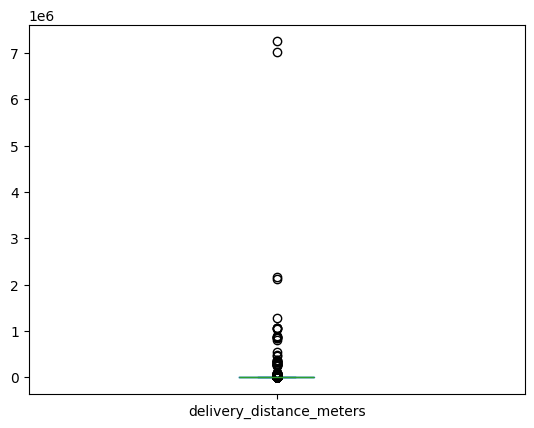

In [33]:
deliveries['delivery_distance_meters'].plot(kind='box')

In [34]:
q1 = deliveries['delivery_distance_meters'].quantile(0.25)
q3 = deliveries['delivery_distance_meters'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = deliveries[(deliveries['delivery_distance_meters'] < limite_inferior) | (deliveries['delivery_distance_meters'] > limite_superior)]
outliers.head()

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
784,2176595,68510957,26666.0,7222.0,DELIVERED
975,2177072,68537759,25651.0,7318.0,DELIVERED
998,2177145,68538927,655.0,7093.0,DELIVERED
1003,2177154,68538487,655.0,6999.0,DELIVERED
1006,2177159,68537700,15898.0,6796.0,DELIVERED


In [35]:
deliveries_tratado = deliveries[(deliveries['delivery_distance_meters'] >= limite_inferior) 
                                & (deliveries['delivery_distance_meters'] <= limite_superior)]
deliveries_tratado.reset_index()
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362928 entries, 0 to 378842
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   delivery_id               362928 non-null  int64  
 1   delivery_order_id         362928 non-null  int64  
 2   driver_id                 362928 non-null  float64
 3   delivery_distance_meters  362928 non-null  float64
 4   delivery_status           362928 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 16.6+ MB


<Axes: >

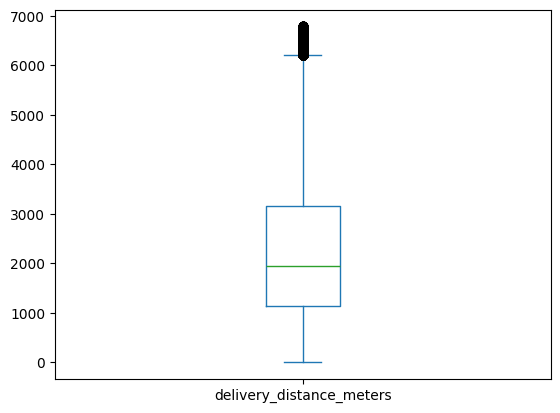

In [36]:
deliveries_tratado['delivery_distance_meters'].plot(kind='box')

In [37]:
deliveries_tratado['delivery_status'].unique()

array(['DELIVERED', 'DELIVERING'], dtype=object)

In [38]:
deliveries_tratado['delivery_status'].value_counts()

delivery_status
DELIVERED     346460
DELIVERING       172
Name: count, dtype: int64

In [39]:
deliveries_tratado = deliveries_tratado[deliveries_tratado['delivery_status'] == 'DELIVERED']
deliveries_tratado

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2174658,68413340,8378.0,5199.0,DELIVERED
1,2174660,68414309,2473.0,410.0,DELIVERED
2,2174661,68416230,7615.0,3784.0,DELIVERED
3,2174663,68412721,8378.0,5714.0,DELIVERED
4,2174675,68414018,10463.0,3746.0,DELIVERED
...,...,...,...,...,...
378836,3128338,93125719,24358.0,3667.0,DELIVERED
378837,3130930,93111400,22345.0,3414.0,DELIVERED
378840,3135849,82340127,55429.0,2546.0,DELIVERED
378841,3142829,88586792,47016.0,3106.0,DELIVERED


## Tratando a base drivers

In [40]:
drivers = drivers[['driver_id', 'driver_modal']]
drivers.head()

,driver_id,driver_modal
0,133,MOTOBOY
1,138,MOTOBOY
2,140,MOTOBOY
3,143,BIKER
4,148,MOTOBOY


## Tratando a base hubs

In [41]:
hubs = hubs[['hub_id', 'hub_state']]
hubs

,hub_id,hub_state
0,2,RS
1,3,RS
2,4,RS
3,5,RJ
4,8,RJ
5,13,RJ
6,16,RJ
7,17,SP
8,18,RJ
9,20,RJ


## Tratando a base orders

In [42]:
orders = orders[['order_id', 'store_id', 'payment_order_id', 'delivery_order_id', 'order_status', 
                 'order_created_day', 'order_created_month', 'order_created_year']]
orders.head()

,order_id,store_id,payment_order_id,delivery_order_id,order_status,order_created_day,order_created_month,order_created_year
0,68405119,3512,68405119,68405119,CANCELED,1,1,2021
1,68405123,3512,68405123,68405123,CANCELED,1,1,2021
2,68405206,3512,68405206,68405206,CANCELED,1,1,2021
3,68405465,3401,68405465,68405465,CANCELED,1,1,2021
4,68406064,3401,68406064,68406064,CANCELED,1,1,2021


In [43]:
orders.isnull().sum()

order_id               0
store_id               0
payment_order_id       0
delivery_order_id      0
order_status           0
order_created_day      0
order_created_month    0
order_created_year     0
dtype: int64

In [44]:
orders.duplicated().sum()

np.int64(0)

In [45]:
orders['order_date'] = orders['order_created_year'].astype(str) + "-" + orders['order_created_month'].astype(str)\
+ "-" + orders['order_created_day'].astype(str)
orders.head()

,order_id,store_id,payment_order_id,delivery_order_id,order_status,order_created_day,order_created_month,order_created_year,order_date
0,68405119,3512,68405119,68405119,CANCELED,1,1,2021,2021-1-1
1,68405123,3512,68405123,68405123,CANCELED,1,1,2021,2021-1-1
2,68405206,3512,68405206,68405206,CANCELED,1,1,2021,2021-1-1
3,68405465,3401,68405465,68405465,CANCELED,1,1,2021,2021-1-1
4,68406064,3401,68406064,68406064,CANCELED,1,1,2021,2021-1-1


In [46]:
orders = orders.drop(columns=['order_created_day', 'order_created_month', 'order_created_year'], axis=1)
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders.head()

,order_id,store_id,payment_order_id,delivery_order_id,order_status,order_date
0,68405119,3512,68405119,68405119,CANCELED,2021-01-01
1,68405123,3512,68405123,68405123,CANCELED,2021-01-01
2,68405206,3512,68405206,68405206,CANCELED,2021-01-01
3,68405465,3401,68405465,68405465,CANCELED,2021-01-01
4,68406064,3401,68406064,68406064,CANCELED,2021-01-01


In [47]:
orders['order_status'].unique()

array(['CANCELED', 'FINISHED'], dtype=object)

In [48]:
orders['order_status'].value_counts()

order_status
FINISHED    352020
CANCELED     16979
Name: count, dtype: int64

In [49]:
orders = orders[orders['order_status'] == 'FINISHED']
orders.head()

,order_id,store_id,payment_order_id,delivery_order_id,order_status,order_date
8,68410055,2181,68410055,68410055,FINISHED,2021-01-01
17,68412721,631,68412721,68412721,FINISHED,2021-01-01
18,68413340,631,68413340,68413340,FINISHED,2021-01-01
19,68414018,3265,68414018,68414018,FINISHED,2021-01-01
20,68414309,236,68414309,68414309,FINISHED,2021-01-01


## Tratando a base payments

<Axes: >

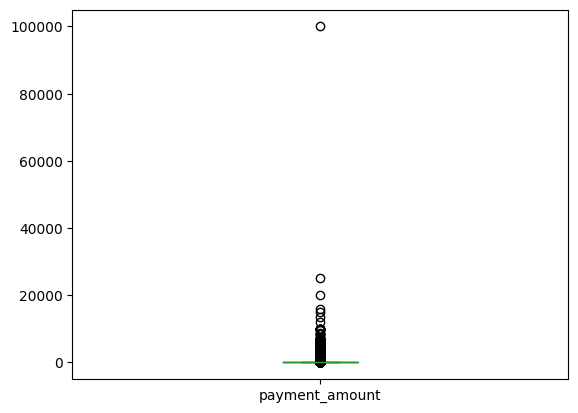

In [50]:
payments['payment_amount'].plot(kind='box')

<Axes: >

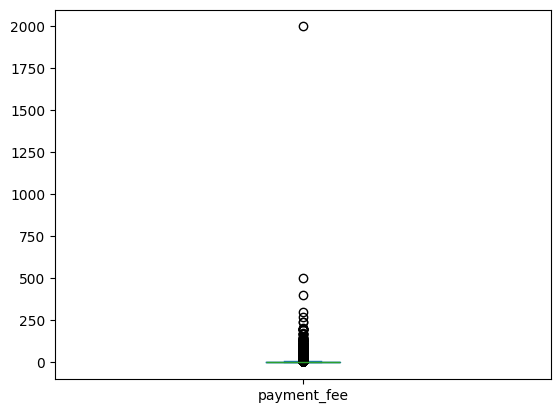

In [51]:
payments['payment_fee'].plot(kind='box')

In [52]:
q1 = payments['payment_amount'].quantile(0.25)
q3 = payments['payment_amount'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = payments[(payments['payment_amount'] < limite_inferior) | (payments['payment_amount'] > limite_superior)]
outliers.head()

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
1,4427918,68410055,394.81,7.90,ONLINE,PAID
76,4428184,68424659,281.90,7.61,ONLINE,PAID
86,4428218,68426299,340.90,5.11,ONLINE,PAID
168,4428432,68434849,681.60,18.40,ONLINE,PAID
190,4428493,68436739,362.00,9.77,ONLINE,PAID


In [53]:
payments_tratado = payments[(payments['payment_amount'] >= limite_inferior) & (payments['payment_amount'] <= limite_superior)]
payments_tratado.reset_index()
payments_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383448 entries, 0 to 400833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   payment_id        383448 non-null  int64  
 1   payment_order_id  383448 non-null  int64  
 2   payment_amount    383448 non-null  float64
 3   payment_fee       383294 non-null  float64
 4   payment_method    383448 non-null  object 
 5   payment_status    383448 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 20.5+ MB


<Axes: >

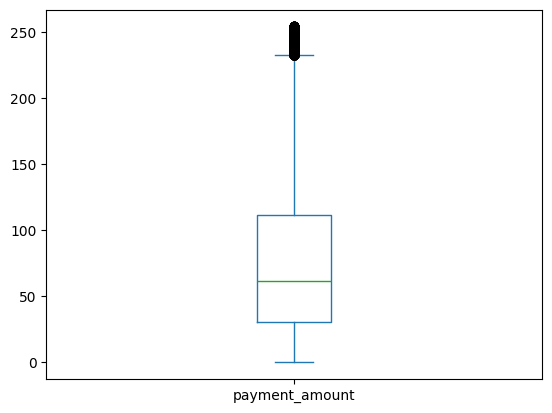

In [54]:
payments_tratado['payment_amount'].plot(kind='box')

<Axes: >

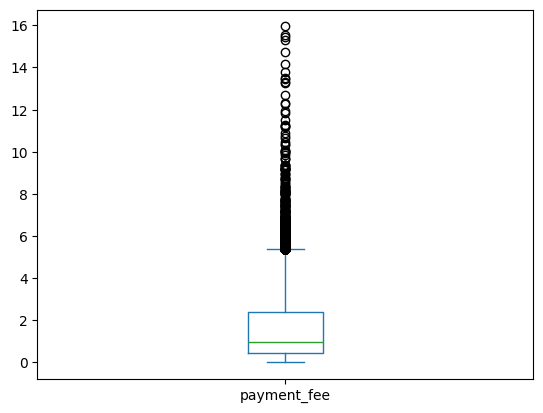

In [55]:
payments_tratado['payment_fee'].plot(kind='box')

## Tratando a base stores

In [56]:
stores = stores[['store_id', 'hub_id', 'store_segment']]
stores.head()

,store_id,hub_id,store_segment
0,3,2,FOOD
1,6,3,FOOD
2,8,3,FOOD
3,53,8,FOOD
4,54,8,FOOD


# Unificando bases de dados

In [57]:
payments_tratado = payments_tratado[['payment_id', 'payment_order_id', 'payment_amount', 'payment_fee']]
payments_tratado.head()

,payment_id,payment_order_id,payment_amount,payment_fee
0,4427917,68410055,118.44,0.00
2,4427941,68412721,206.95,5.59
3,4427948,68413340,58.80,1.59
4,4427955,68414018,45.80,0.92
5,4427956,68414309,106.80,2.88


In [58]:
payments_tratado['order_revenue'] = ((payments_tratado['payment_amount'] - payments_tratado['payment_fee']) * 0.15) - 5
payments_tratado.head()

,payment_id,payment_order_id,payment_amount,payment_fee,order_revenue
0,4427917,68410055,118.44,0.00,12.7660
2,4427941,68412721,206.95,5.59,25.2040
3,4427948,68413340,58.80,1.59,3.5815
4,4427955,68414018,45.80,0.92,1.7320
5,4427956,68414309,106.80,2.88,10.5880


In [59]:
df = orders.merge(deliveries_tratado, on='delivery_order_id', how='left')
df.head()

,order_id,store_id,payment_order_id,delivery_order_id,order_status,order_date,delivery_id,driver_id,delivery_distance_meters,delivery_status
0,68410055,2181,68410055,68410055,FINISHED,2021-01-01,2180133.0,10239.0,1035.0,DELIVERED
1,68412721,631,68412721,68412721,FINISHED,2021-01-01,2174663.0,8378.0,5714.0,DELIVERED
2,68413340,631,68413340,68413340,FINISHED,2021-01-01,2174658.0,8378.0,5199.0,DELIVERED
3,68414018,3265,68414018,68414018,FINISHED,2021-01-01,2174675.0,10463.0,3746.0,DELIVERED
4,68414309,236,68414309,68414309,FINISHED,2021-01-01,2174660.0,2473.0,410.0,DELIVERED


In [60]:
df.isnull().sum()

order_id                        0
store_id                        0
payment_order_id                0
delivery_order_id               0
order_status                    0
order_date                      0
delivery_id                 24110
driver_id                   24110
delivery_distance_meters    24110
delivery_status             24110
dtype: int64

In [61]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df['driver_id'] = df['driver_id'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344829 entries, 0 to 344828
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   index                     344829 non-null  int64         
 1   order_id                  344829 non-null  int64         
 2   store_id                  344829 non-null  int64         
 3   payment_order_id          344829 non-null  int64         
 4   delivery_order_id         344829 non-null  int64         
 5   order_status              344829 non-null  object        
 6   order_date                344829 non-null  datetime64[ns]
 7   delivery_id               344829 non-null  float64       
 8   driver_id                 344829 non-null  int64         
 9   delivery_distance_meters  344829 non-null  float64       
 10  delivery_status           344829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usag

In [62]:
df = df.merge(payments_tratado, on='payment_order_id', how='left')
df.head()

,index,order_id,store_id,payment_order_id,delivery_order_id,order_status,order_date,delivery_id,driver_id,delivery_distance_meters,delivery_status,payment_id,payment_amount,payment_fee,order_revenue
0,0,68410055,2181,68410055,68410055,FINISHED,2021-01-01,2180133.0,10239,1035.0,DELIVERED,4427917.0,118.44,0.00,12.7660
1,1,68412721,631,68412721,68412721,FINISHED,2021-01-01,2174663.0,8378,5714.0,DELIVERED,4427941.0,206.95,5.59,25.2040
2,2,68413340,631,68413340,68413340,FINISHED,2021-01-01,2174658.0,8378,5199.0,DELIVERED,4427948.0,58.80,1.59,3.5815
3,3,68414018,3265,68414018,68414018,FINISHED,2021-01-01,2174675.0,10463,3746.0,DELIVERED,4427955.0,45.80,0.92,1.7320
4,4,68414309,236,68414309,68414309,FINISHED,2021-01-01,2174660.0,2473,410.0,DELIVERED,4427956.0,106.80,2.88,10.5880


In [63]:
df.dropna(inplace = True)
df.reset_index(inplace = True)
df['payment_id'] = df['payment_id'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378714 entries, 0 to 378713
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   level_0                   378714 non-null  int64         
 1   index                     378714 non-null  int64         
 2   order_id                  378714 non-null  int64         
 3   store_id                  378714 non-null  int64         
 4   payment_order_id          378714 non-null  int64         
 5   delivery_order_id         378714 non-null  int64         
 6   order_status              378714 non-null  object        
 7   order_date                378714 non-null  datetime64[ns]
 8   delivery_id               378714 non-null  float64       
 9   driver_id                 378714 non-null  int64         
 10  delivery_distance_meters  378714 non-null  float64       
 11  delivery_status           378714 non-null  object        
 12  pa

In [64]:
df = df.merge(drivers, on='driver_id', how='left')
df.head()

,level_0,index,order_id,store_id,payment_order_id,delivery_order_id,order_status,order_date,delivery_id,driver_id,delivery_distance_meters,delivery_status,payment_id,payment_amount,payment_fee,order_revenue,driver_modal
0,0,0,68410055,2181,68410055,68410055,FINISHED,2021-01-01,2180133.0,10239,1035.0,DELIVERED,4427917,118.44,0.00,12.7660,BIKER
1,1,1,68412721,631,68412721,68412721,FINISHED,2021-01-01,2174663.0,8378,5714.0,DELIVERED,4427941,206.95,5.59,25.2040,MOTOBOY
2,2,2,68413340,631,68413340,68413340,FINISHED,2021-01-01,2174658.0,8378,5199.0,DELIVERED,4427948,58.80,1.59,3.5815,MOTOBOY
3,3,3,68414018,3265,68414018,68414018,FINISHED,2021-01-01,2174675.0,10463,3746.0,DELIVERED,4427955,45.80,0.92,1.7320,MOTOBOY
4,4,4,68414309,236,68414309,68414309,FINISHED,2021-01-01,2174660.0,2473,410.0,DELIVERED,4427956,106.80,2.88,10.5880,BIKER


In [65]:
df = df.merge(stores, on='store_id', how='left')
df.head()

,level_0,index,order_id,store_id,payment_order_id,delivery_order_id,order_status,order_date,delivery_id,driver_id,delivery_distance_meters,delivery_status,payment_id,payment_amount,payment_fee,order_revenue,driver_modal,hub_id,store_segment
0,0,0,68410055,2181,68410055,68410055,FINISHED,2021-01-01,2180133.0,10239,1035.0,DELIVERED,4427917,118.44,0.00,12.7660,BIKER,13,GOOD
1,1,1,68412721,631,68412721,68412721,FINISHED,2021-01-01,2174663.0,8378,5714.0,DELIVERED,4427941,206.95,5.59,25.2040,MOTOBOY,28,FOOD
2,2,2,68413340,631,68413340,68413340,FINISHED,2021-01-01,2174658.0,8378,5199.0,DELIVERED,4427948,58.80,1.59,3.5815,MOTOBOY,28,FOOD
3,3,3,68414018,3265,68414018,68414018,FINISHED,2021-01-01,2174675.0,10463,3746.0,DELIVERED,4427955,45.80,0.92,1.7320,MOTOBOY,37,FOOD
4,4,4,68414309,236,68414309,68414309,FINISHED,2021-01-01,2174660.0,2473,410.0,DELIVERED,4427956,106.80,2.88,10.5880,BIKER,13,FOOD


In [66]:
df.isnull().sum()

level_0                     0
index                       0
order_id                    0
store_id                    0
payment_order_id            0
delivery_order_id           0
order_status                0
order_date                  0
delivery_id                 0
driver_id                   0
delivery_distance_meters    0
delivery_status             0
payment_id                  0
payment_amount              0
payment_fee                 0
order_revenue               0
driver_modal                0
hub_id                      0
store_segment               0
dtype: int64

In [67]:
df = df.merge(hubs, on='hub_id', how='left')
df.head()

,level_0,index,order_id,store_id,payment_order_id,delivery_order_id,order_status,order_date,delivery_id,driver_id,delivery_distance_meters,delivery_status,payment_id,payment_amount,payment_fee,order_revenue,driver_modal,hub_id,store_segment,hub_state
0,0,0,68410055,2181,68410055,68410055,FINISHED,2021-01-01,2180133.0,10239,1035.0,DELIVERED,4427917,118.44,0.00,12.7660,BIKER,13,GOOD,RJ
1,1,1,68412721,631,68412721,68412721,FINISHED,2021-01-01,2174663.0,8378,5714.0,DELIVERED,4427941,206.95,5.59,25.2040,MOTOBOY,28,FOOD,SP
2,2,2,68413340,631,68413340,68413340,FINISHED,2021-01-01,2174658.0,8378,5199.0,DELIVERED,4427948,58.80,1.59,3.5815,MOTOBOY,28,FOOD,SP
3,3,3,68414018,3265,68414018,68414018,FINISHED,2021-01-01,2174675.0,10463,3746.0,DELIVERED,4427955,45.80,0.92,1.7320,MOTOBOY,37,FOOD,SP
4,4,4,68414309,236,68414309,68414309,FINISHED,2021-01-01,2174660.0,2473,410.0,DELIVERED,4427956,106.80,2.88,10.5880,BIKER,13,FOOD,RJ


In [68]:
df.isnull().sum()

level_0                     0
index                       0
order_id                    0
store_id                    0
payment_order_id            0
delivery_order_id           0
order_status                0
order_date                  0
delivery_id                 0
driver_id                   0
delivery_distance_meters    0
delivery_status             0
payment_id                  0
payment_amount              0
payment_fee                 0
order_revenue               0
driver_modal                0
hub_id                      0
store_segment               0
hub_state                   0
dtype: int64

In [69]:
df.drop(columns=['hub_id', 'delivery_status', 'index', 'level_0'], axis=1, inplace=True)
df.reset_index(inplace = True, drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378714 entries, 0 to 378713
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  378714 non-null  int64         
 1   store_id                  378714 non-null  int64         
 2   payment_order_id          378714 non-null  int64         
 3   delivery_order_id         378714 non-null  int64         
 4   order_status              378714 non-null  object        
 5   order_date                378714 non-null  datetime64[ns]
 6   delivery_id               378714 non-null  float64       
 7   driver_id                 378714 non-null  int64         
 8   delivery_distance_meters  378714 non-null  float64       
 9   payment_id                378714 non-null  int64         
 10  payment_amount            378714 non-null  float64       
 11  payment_fee               378714 non-null  float64       
 12  or

# Resolvendo demandas

## Ranking de entregadores

In [70]:
ranking = df.groupby(by=['driver_id', 'driver_modal'])['delivery_distance_meters'].sum().sort_values(ascending=False).reset_index()
ranking

,driver_id,driver_modal,delivery_distance_meters
0,25651,MOTOBOY,33531568.0
1,26223,MOTOBOY,17549561.0
2,7615,MOTOBOY,3239427.0
3,7549,MOTOBOY,2761644.0
4,9806,MOTOBOY,2757244.0
...,...,...,...
4489,42665,BIKER,244.0
4490,5110,MOTOBOY,171.0
4491,32545,BIKER,148.0
4492,40411,BIKER,69.0


In [71]:
ranking_moto = ranking[ranking['driver_modal'] == "MOTOBOY"]
ranking_moto.head(20)

,driver_id,driver_modal,delivery_distance_meters
0,25651,MOTOBOY,33531568.0
1,26223,MOTOBOY,17549561.0
2,7615,MOTOBOY,3239427.0
3,7549,MOTOBOY,2761644.0
4,9806,MOTOBOY,2757244.0
5,4737,MOTOBOY,2742996.0
6,11522,MOTOBOY,2613932.0
7,32109,MOTOBOY,2551168.0
8,902,MOTOBOY,2477290.0
9,24584,MOTOBOY,2422352.0


In [72]:
ranking_biker = ranking[ranking['driver_modal'] == "BIKER"]
ranking_biker.head(20)

,driver_id,driver_modal,delivery_distance_meters
199,3780,BIKER,995601.0
204,794,BIKER,971670.0
272,12724,BIKER,760635.0
286,7638,BIKER,723981.0
288,18487,BIKER,714211.0
303,1203,BIKER,685204.0
310,7773,BIKER,670548.0
313,14059,BIKER,669149.0
319,18748,BIKER,664427.0
320,4536,BIKER,658929.0


## Média de metros percorrida por entrega em cada estado

In [73]:
media_entrega = df.groupby(['driver_modal', 'hub_state']).agg(mean_delivery_distance=(
    'delivery_distance_meters', 
    'mean')).sort_values(by='mean_delivery_distance', ascending=False).reset_index()
media_entrega

,driver_modal,hub_state,mean_delivery_distance
0,MOTOBOY,RS,3127.157805
1,MOTOBOY,PR,2858.729759
2,MOTOBOY,RJ,2701.261781
3,MOTOBOY,SP,2569.441885
4,BIKER,PR,1428.830947
5,BIKER,RS,1184.385644
6,BIKER,SP,1075.862877
7,BIKER,RJ,1017.065104


## Receitas médias e totais por segmento e estados

In [74]:
segment_mean_revenue = df.groupby(by=['store_segment']).agg(mean_revenue=('order_revenue', 
                                                                          'mean')).sort_values(by='store_segment', 
                                                                          ascending=False).reset_index()
segment_mean_revenue['mean_revenue'] = segment_mean_revenue['mean_revenue'].round(2)
segment_mean_revenue

,store_segment,mean_revenue
0,GOOD,11.96
1,FOOD,5.82


<Axes: xlabel='store_segment'>

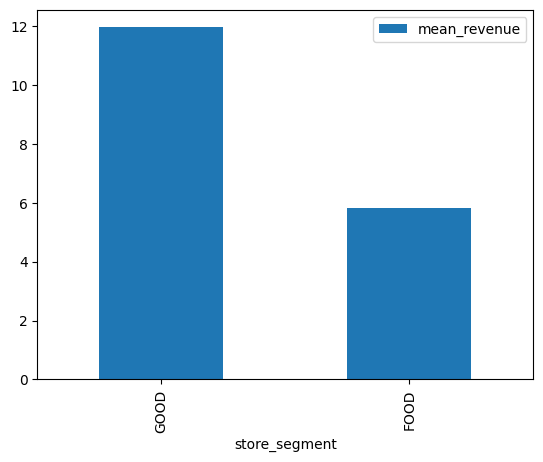

In [75]:
segment_mean_revenue.plot(kind='bar', x='store_segment', y='mean_revenue')

In [76]:
segment_total_revenue = df.groupby(by=['store_segment']).agg(total_revenue=('order_revenue', 
                                                                            'sum')).sort_values(by='store_segment', 
                                                                            ascending=False).reset_index()
segment_total_revenue['total_revenue'] = segment_total_revenue['total_revenue'].round(2)
segment_total_revenue

,store_segment,total_revenue
0,GOOD,266027.68
1,FOOD,2073005.87


<Axes: xlabel='store_segment'>

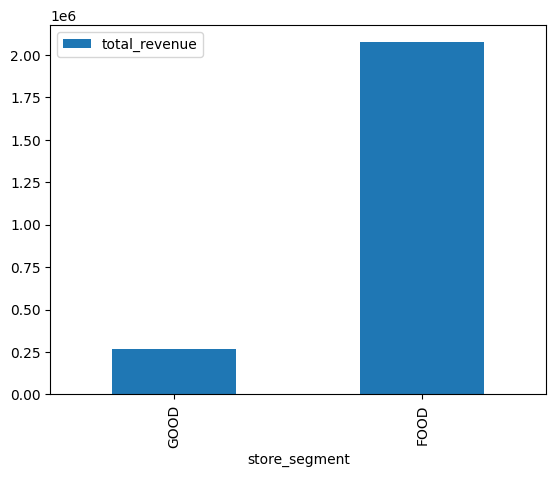

In [77]:
segment_total_revenue.plot(kind='bar', x='store_segment', y='total_revenue')

In [78]:
state_mean_revenue = df.groupby('hub_state').agg(mean_revenue=('order_revenue', 'mean')).reset_index()
state_mean_revenue['mean_revenue'] = state_mean_revenue['mean_revenue'].round(2)
state_mean_revenue

,hub_state,mean_revenue
0,PR,2.05
1,RJ,6.30
2,RS,3.69
3,SP,7.46


In [79]:
state_mean_revenue.sort_values(by='mean_revenue', ascending=False, inplace=True)

<Axes: xlabel='hub_state'>

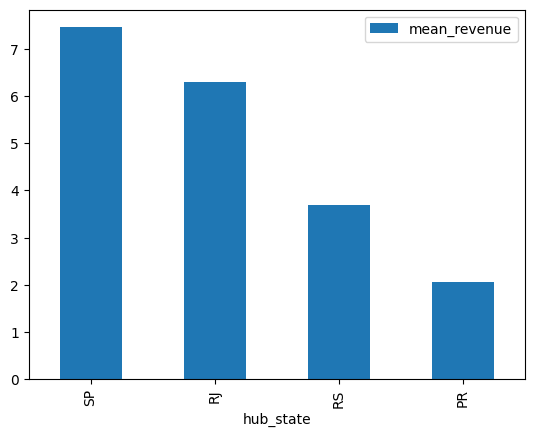

In [80]:
state_mean_revenue.plot(kind='bar', x='hub_state', y='mean_revenue')

In [81]:
state_total_revenue = df.groupby('hub_state').agg(total_revenue=('order_revenue', 'sum')).reset_index()
state_total_revenue['total_revenue'] = state_total_revenue['total_revenue'].round(2)
state_total_revenue

,hub_state,total_revenue
0,PR,66294.59
1,RJ,926442.74
2,RS,137065.08
3,SP,1209231.14


In [82]:
state_total_revenue.sort_values(by='total_revenue', ascending=False, inplace=True)

<Axes: xlabel='hub_state'>

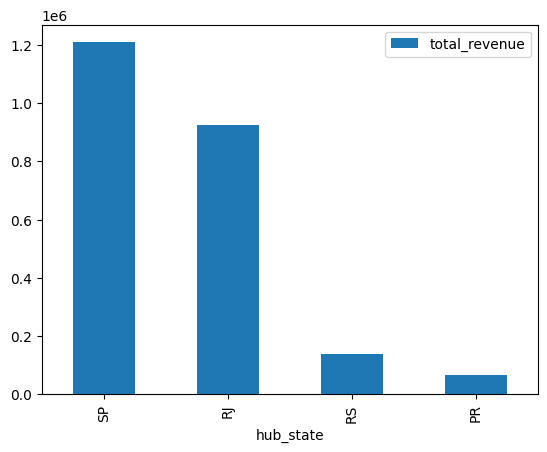

In [83]:
state_total_revenue.plot(kind='bar', x='hub_state', y='total_revenue')

In [84]:
print(f"O bônus para cada funcionário será de R$ {((df.order_revenue.sum() * 0.20) / 2000).round(2)}")

O bônus para cada funcionário será de R$ 233.9
